https://finance.yahoo.com/calendar/earnings/?day=2023-12-22
Options data for BANX:
Average IV for Calls: 0.28394270751953127
Average IV for Puts: nan
Total Call Volume: 11.0
Total Call open interest: 36
Total Call engagement: 47.0
Total Put Volume: 54.0
Total Put open interest: 92.0
Total Put engagement: 146.0
Number of ITM Call Options: 2
Number of ITM Put Options: 1


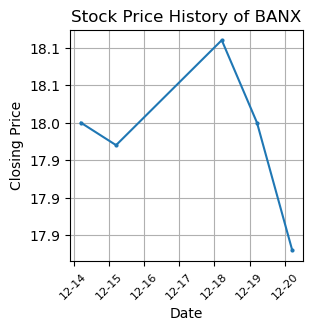

Options data for MDVL:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 2
Total Call open interest: 0
Total Call engagement: 2
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 1
Number of ITM Put Options: 0


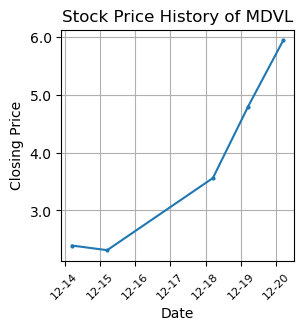

Options data for OMEX:
Average IV for Calls: 1.5454670571831597
Average IV for Puts: 1.7252633333333331
Total Call Volume: 422.0
Total Call open interest: 4240
Total Call engagement: 4662.0
Total Put Volume: 122.0
Total Put open interest: 1489
Total Put engagement: 1611.0
Number of ITM Call Options: 5
Number of ITM Put Options: 3


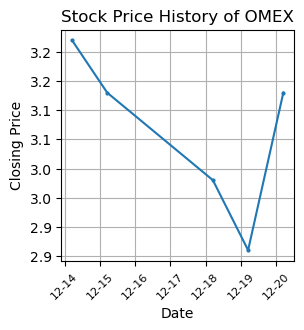

Options data for UONEK:
Average IV for Calls: 2.4889350431315105
Average IV for Puts: nan
Total Call Volume: 14
Total Call open interest: 99
Total Call engagement: 113
Total Put Volume: 0.0
Total Put open interest: 2.0
Total Put engagement: 2.0
Number of ITM Call Options: 1
Number of ITM Put Options: 1


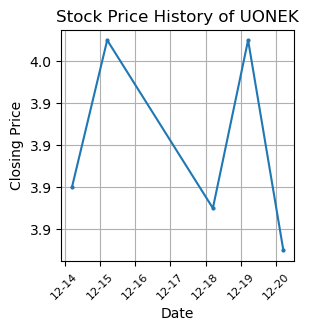

Options data for ENLV:
Average IV for Calls: 1.527346554361979
Average IV for Puts: nan
Total Call Volume: 162
Total Call open interest: 1870
Total Call engagement: 2032
Total Put Volume: 1.0
Total Put open interest: 0.0
Total Put engagement: 1.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


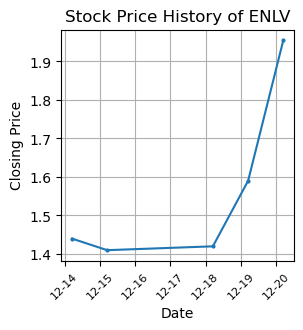

Options data for LILM:
Average IV for Calls: 1.714342472691761
Average IV for Puts: nan
Total Call Volume: 528
Total Call open interest: 42862
Total Call engagement: 43390
Total Put Volume: 388.0
Total Put open interest: 3972.0
Total Put engagement: 4360.0
Number of ITM Call Options: 5
Number of ITM Put Options: 16


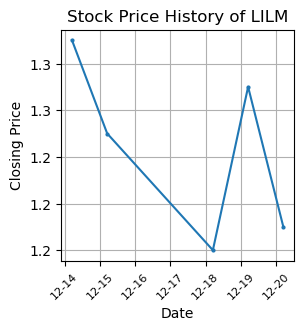

Options data for ARVL:
Average IV for Calls: nan
Average IV for Puts: 2.2928603274739587
Total Call Volume: 1292.0
Total Call open interest: 31188.0
Total Call engagement: 32480.0
Total Put Volume: 1100.0
Total Put open interest: 10543
Total Put engagement: 11643.0
Number of ITM Call Options: 4
Number of ITM Put Options: 19


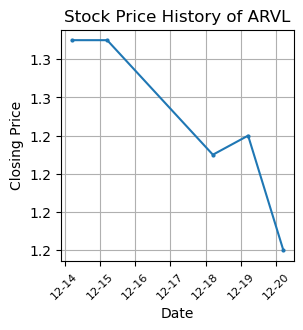

Options data for FUV:
Average IV for Calls: 1.9878513216145832
Average IV for Puts: 1.2196771329273892
Total Call Volume: 971
Total Call open interest: 8319
Total Call engagement: 9290
Total Put Volume: 657.0
Total Put open interest: 1649
Total Put engagement: 2306.0
Number of ITM Call Options: 1
Number of ITM Put Options: 16


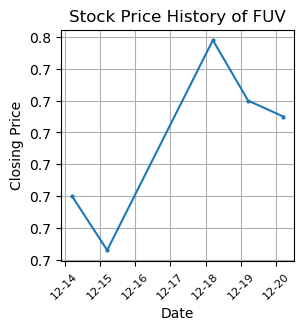

Options data for CAMP:
Average IV for Calls: 3.1093772265624997
Average IV for Puts: nan
Total Call Volume: 2
Total Call open interest: 342
Total Call engagement: 344
Total Put Volume: 1.0
Total Put open interest: 6.0
Total Put engagement: 7.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


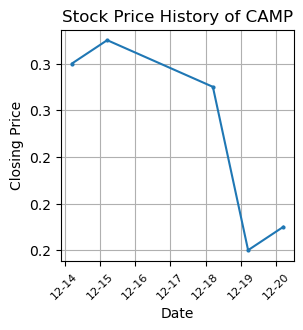

Options data for FXLV:
Average IV for Calls: 1.8333347395833337
Average IV for Puts: nan
Total Call Volume: 8.0
Total Call open interest: 918
Total Call engagement: 926.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


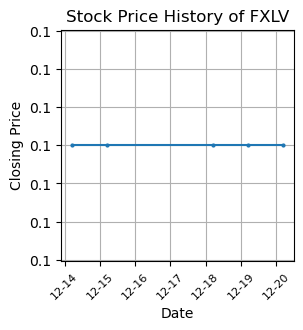

Options data for ONCR:
Average IV for Calls: 0.500005
Average IV for Puts: 1.0000000000000003e-05
Total Call Volume: 15
Total Call open interest: 0
Total Call engagement: 15
Total Put Volume: 0.0
Total Put open interest: 0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


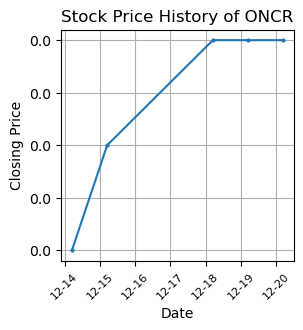

Options data for NMTRQ:
Average IV for Calls: 0.0
Average IV for Puts: nan
Total Call Volume: 0.0
Total Call open interest: 333.0
Total Call engagement: 333.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


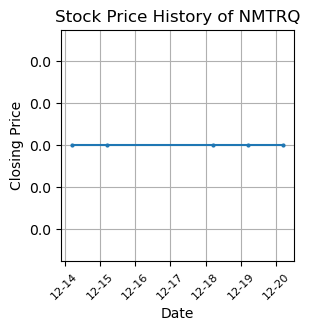

In [2]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-22'

# Initialize list to hold DataFrame objects
ticker_data_list = []

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day

print(url)

ticker_data_sorted, _ = scrape_and_process_yahoo_finance_data(url, ticker_data_list)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date - timedelta(days=1)
start_date = release_date - timedelta(days=8)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
